# Visualize the Correlation Table

In [1]:
import os, sys

if os.path.basename(os.getcwd()) == 'code':
    os.chdir('../')
sys.path.append('code')

import numpy as np
import pandas as pd
import glob
import pprint
from scipy.stats import pearsonr
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import re
from src.formation import FormationCell
from src.utils import build_correlation_table

In [2]:
assert os.path.basename(os.getcwd()) == 'project-formation'

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Configure paths

In [4]:
OUTPUT_PATH = 'output/2021-03-fast-formation-esoh-fits/'

## Configure plot settings

In [5]:
# Configure plot settings
plt.rc('font', **{'family'     : 'sans-serif',
                  'sans-serif' : ['Times New Roman'],
                  'size': 26
                  })
plt.rc('figure', **{'autolayout' : True,
                    'figsize'    : (10, 8),
                    'facecolor'  : 'white'
                    })
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes',  labelsize='medium', grid=True)
plt.rc('axes',  titlesize='medium')
plt.rc('legend', fontsize='medium')



DPI = 600
VOLTAGE_LIMITS = (2.95, 4.25)
CAPACITY_LIMITS = (0, 3)

ORANGE = (1, 0.5, 0)
BLUE = (0, 0.5, 1)
BLACK = (0.0, 0.0, 0.0)
GREEN = (0, 0.75, 0)
ORANGE = (1, 0.5, 0)

## Compile and export the table containing all of the results

This compilation will include data from:
- formation
- cycling
- eSOH metrics

In [7]:
df_corr = build_correlation_table()

Working on compiling data on cell #1...
Working on compiling data on cell #2...
Working on compiling data on cell #3...
Working on compiling data on cell #4...
Working on compiling data on cell #5...
Working on compiling data on cell #6...
Working on compiling data on cell #7...
Working on compiling data on cell #8...
Working on compiling data on cell #10...
Working on compiling data on cell #11...
Working on compiling data on cell #12...
Working on compiling data on cell #13...
Working on compiling data on cell #14...
Working on compiling data on cell #15...
Working on compiling data on cell #16...
Working on compiling data on cell #17...
Working on compiling data on cell #18...
Working on compiling data on cell #19...
Working on compiling data on cell #20...
Working on compiling data on cell #21...
Working on compiling data on cell #22...
Working on compiling data on cell #23...
Working on compiling data on cell #24...
Working on compiling data on cell #25...
Working on compiling dat

In [8]:
df_corr.columns

Index(['cellid', 'channel_number', 'is_room_temp_aging',
       'is_baseline_formation', 'form_first_discharge_capacity_below_3p2v_ah',
       'form_first_discharge_rest_voltage_rebound_1s',
       'form_first_discharge_rest_voltage_rebound_10s',
       'form_first_discharge_rest_voltage_rebound_1800s',
       'form_last_charge_voltage_trace_cap_ah',
       'form_last_charge_voltage_trace_voltage_v',
       ...
       'rpt_c524_delta_v', 'rpt_c577_delta_v', 'var_q_c20_c630_c3_ah',
       'var_q_c20_c630_c3_delta_q', 'var_q_c20_c630_c3_delta_v',
       'rpt_c630_delta_v', 'var_q_c20_c574_c3_ah', 'var_q_c20_c574_c3_delta_q',
       'var_q_c20_c574_c3_delta_v', 'rpt_c574_delta_v'],
      dtype='object', length=663)

In [9]:
df_corr

cellid  channel_number  is_room_temp_aging  is_baseline_formation  \
0        1              22                   0                      1   
1        2              23                   0                      1   
2        3              24                   0                      1   
3        4              25                   0                      1   
4        5              26                   0                      1   
5        6              27                   0                      1   
6        7              28                   0                      1   
7        8              29                   0                      1   
8       10              31                   0                      1   
9       11               1                   1                      1   
10      12               2                   1                      1   
11      13               3                   1                      1   
12      14               4                   1                      1   
13      15               5                   1                      1   
14      16               6                   1                      1   
15      17               7                   1                      1   
16      18               8                   1                      1   
17      19              10                   1                      1   
18      20              11                   1                      1   
19      21              12                   1                      0   
20      22              13                   1                      0   
21      23              14                   1                      0   
22      24              15                   1                      0   
23      25              16                   1                      0   
24      26              17                   1                      0   
25      27              18                   1                      0   
26      28              19                   1                      0   
27      29              20                   1                      0   
28      30              21                   1                      0   
29      31              32                   0                      0   
30      32              33                   0                      0   
31      33              34                   0                      0   
32      34              35                   0                      0   
33      35              36                   0                      0   
34      36              37                   0                      0   
35      37              38                   0                      0   
36      38              39                   0                      0   
37      39              40                   0                      0   
38      40              41                   0                      0   

    form_first_discharge_capacity_below_3p2v_ah  \
0                                      0.077820   
1                                      0.073791   
2                                      0.074725   
3                                      0.069433   
4                                      0.073127   
5                                      0.071483   
6                                      0.076523   
7                                      0.066771   
8                                      0.070995   
9                                      0.076570   
10                                     0.076687   
11                                     0.072891   
12                                     0.078141   
13                                     0.080460   
14                                     0.074184   
15                                     0.069909   
16                                     0.070156   
17                                     0.075486   
18                                     0.072030   
19                                     0.028163   
20          

In [11]:
df_corr_rt = df_corr[df_corr['is_room_temp_aging'] == True]
# df_corr_rt = df_corr_rt.drop(columns=['cellid', 'is_baseline_formation', 'is_room_temp_aging'])
df_corr_ht = df_corr[df_corr['is_room_temp_aging'] == False]
# df_corr_ht = df_corr_ht.drop(columns=['cellid', 'is_baseline_formation', 'is_room_temp_aging'])

# df_corr = df_corr.drop(columns=['cellid', 'is_baseline_formation', 'is_room_temp_aging'])


## Make some correlation plots

## The correlation plot for hot temperatures

In [12]:
df_corr_ht

cellid  channel_number  is_room_temp_aging  is_baseline_formation  \
0        1              22                   0                      1   
1        2              23                   0                      1   
2        3              24                   0                      1   
3        4              25                   0                      1   
4        5              26                   0                      1   
5        6              27                   0                      1   
6        7              28                   0                      1   
7        8              29                   0                      1   
8       10              31                   0                      1   
29      31              32                   0                      0   
30      32              33                   0                      0   
31      33              34                   0                      0   
32      34              35                   0                      0   
33      35              36                   0                      0   
34      36              37                   0                      0   
35      37              38                   0                      0   
36      38              39                   0                      0   
37      39              40                   0                      0   
38      40              41                   0                      0   

    form_first_discharge_capacity_below_3p2v_ah  \
0                                      0.077820   
1                                      0.073791   
2                                      0.074725   
3                                      0.069433   
4                                      0.073127   
5                                      0.071483   
6                                      0.076523   
7                                      0.066771   
8                                      0.070995   
29                                     0.025480   
30                                     0.023201   
31                                     0.023901   
32                                     0.023699   
33                                     0.024648   
34                                     0.024111   
35                                     0.026001   
36                                     0.023123   
37                                     0.023870   
38                                     0.024865   

    form_first_discharge_rest_voltage_rebound_1s  \
0                                       3.010586   
1                                       3.011151   
2                                       3.010842   
3                                       3.010670   
4                                       3.010769   
5                                       3.010406   
6                                       3.010416   
7                                       3.011265   
8                                       3.010797   
29                                           NaN   
30                                           NaN   
31                                           NaN   
32                                           NaN   
33                                           NaN   
34                                           NaN   
35                                           NaN   
36                                           NaN   
37                                           NaN   
38                                           NaN   

    form_first_discharge_rest_voltage_rebound_10s  \
0                                        3.057576   
1                                        3.061895   
2                                        3.060853   
3                                        3.059812   
4                                        3.060117   
5                                        3.054375   
6                                        3.057246   
7                                        3.062353   
8   

## High Temperature Correlation Plot

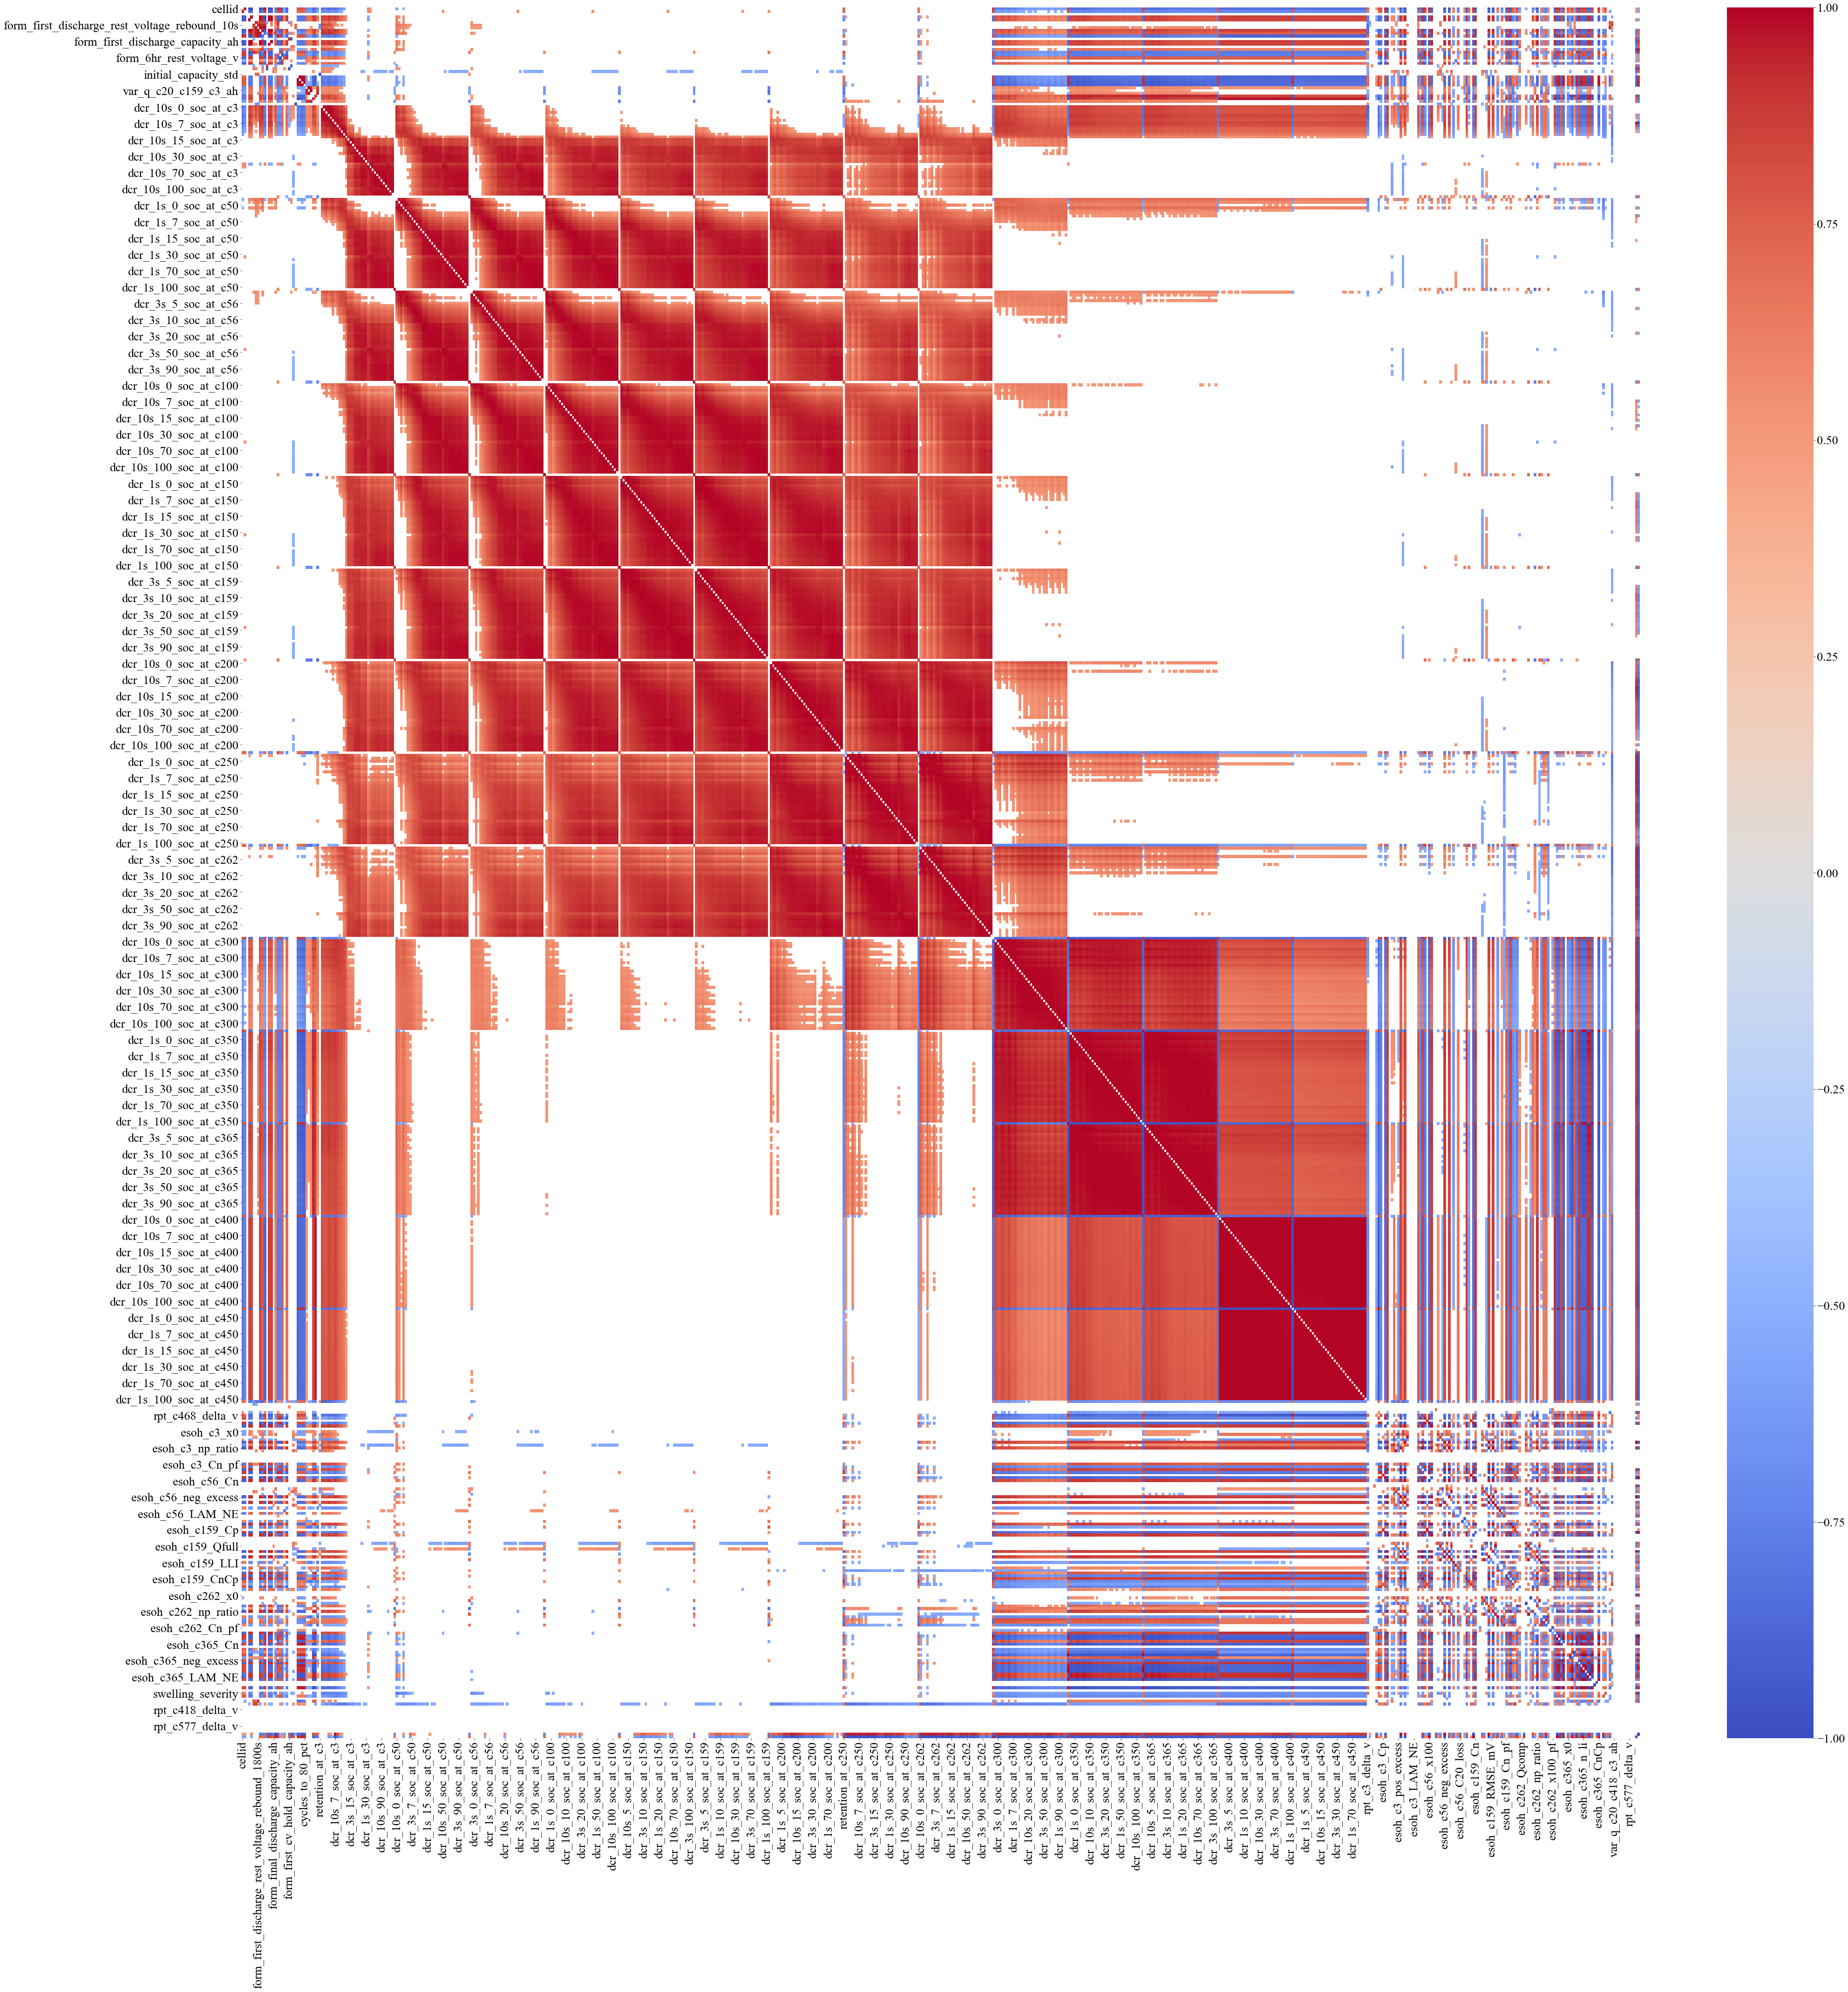

In [13]:
dfCorr = df_corr_ht.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
fig = plt.figure(figsize=(60,60))
sns.heatmap(filteredDf, annot=False, cmap="coolwarm")
plt.savefig('correlation_matrix_ht.png')
plt.show()

## Room Temperature Correlation Plot

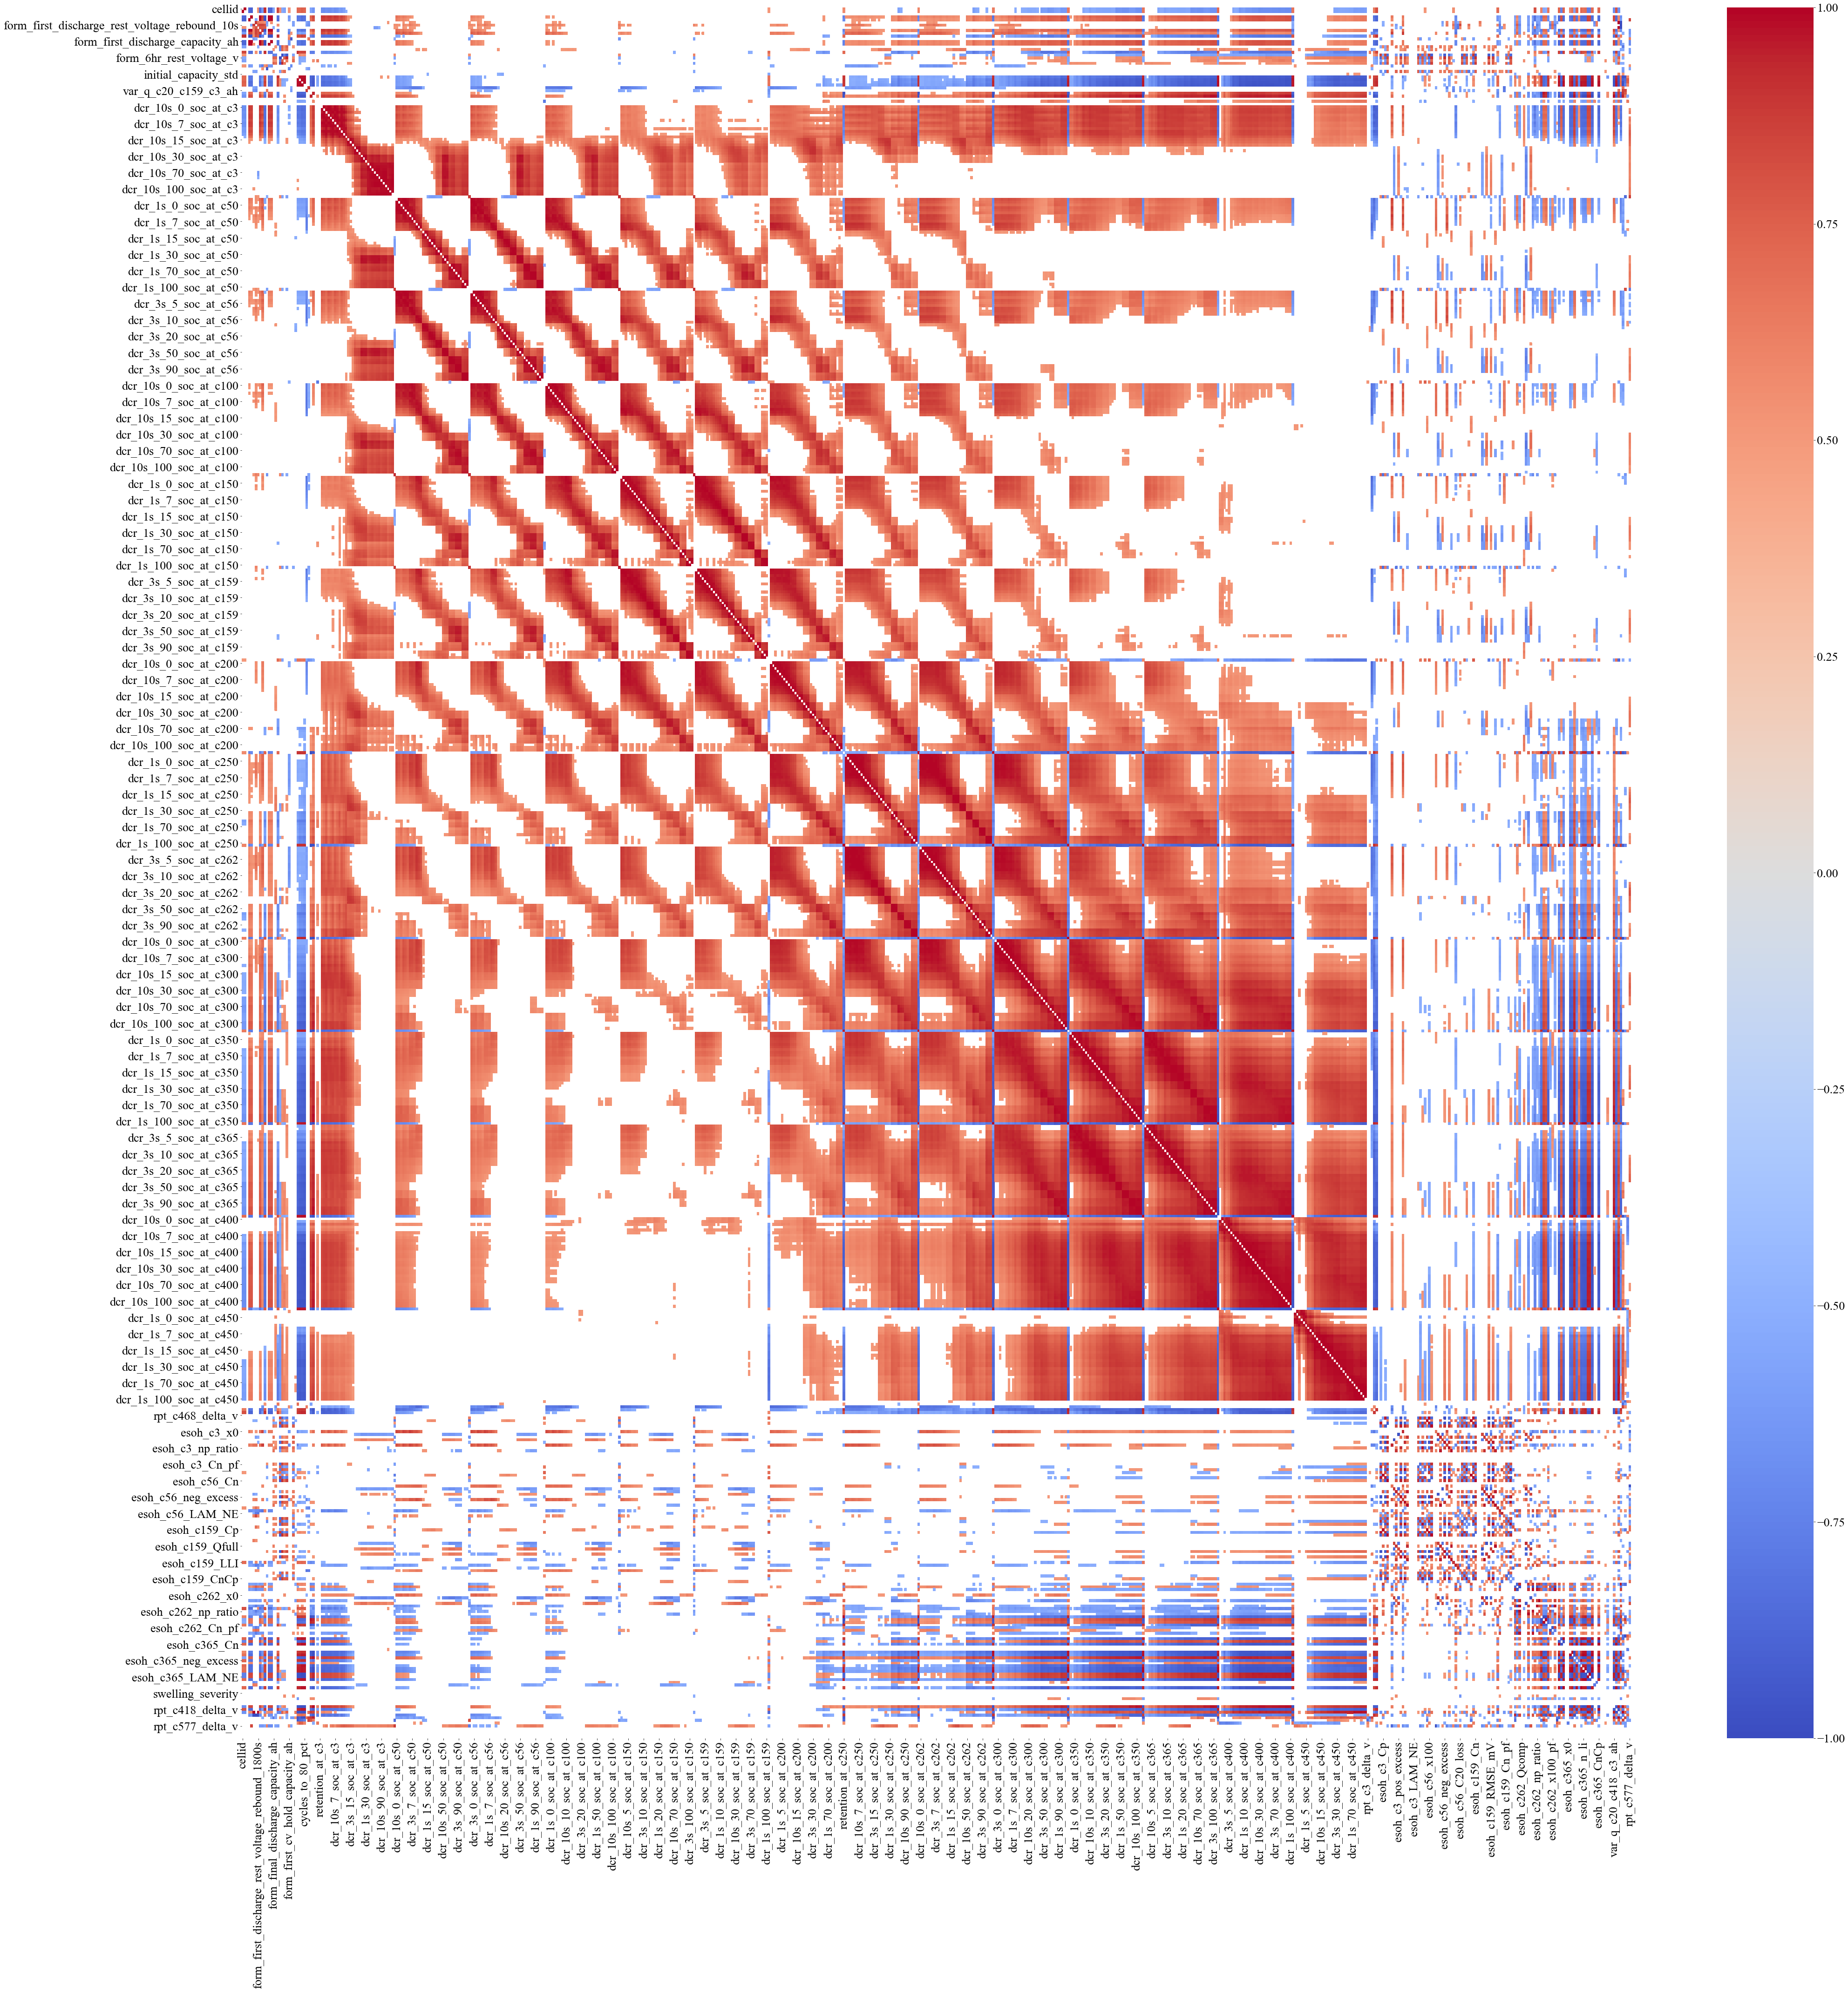

In [14]:
dfCorr = df_corr_rt.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
fig = plt.figure(figsize=(60,60))
sns.heatmap(filteredDf, annot=False, cmap="coolwarm")
plt.savefig('correlation_matrix_rt.png')
plt.show()

## Correlation Plot - High Temp and Room Temp

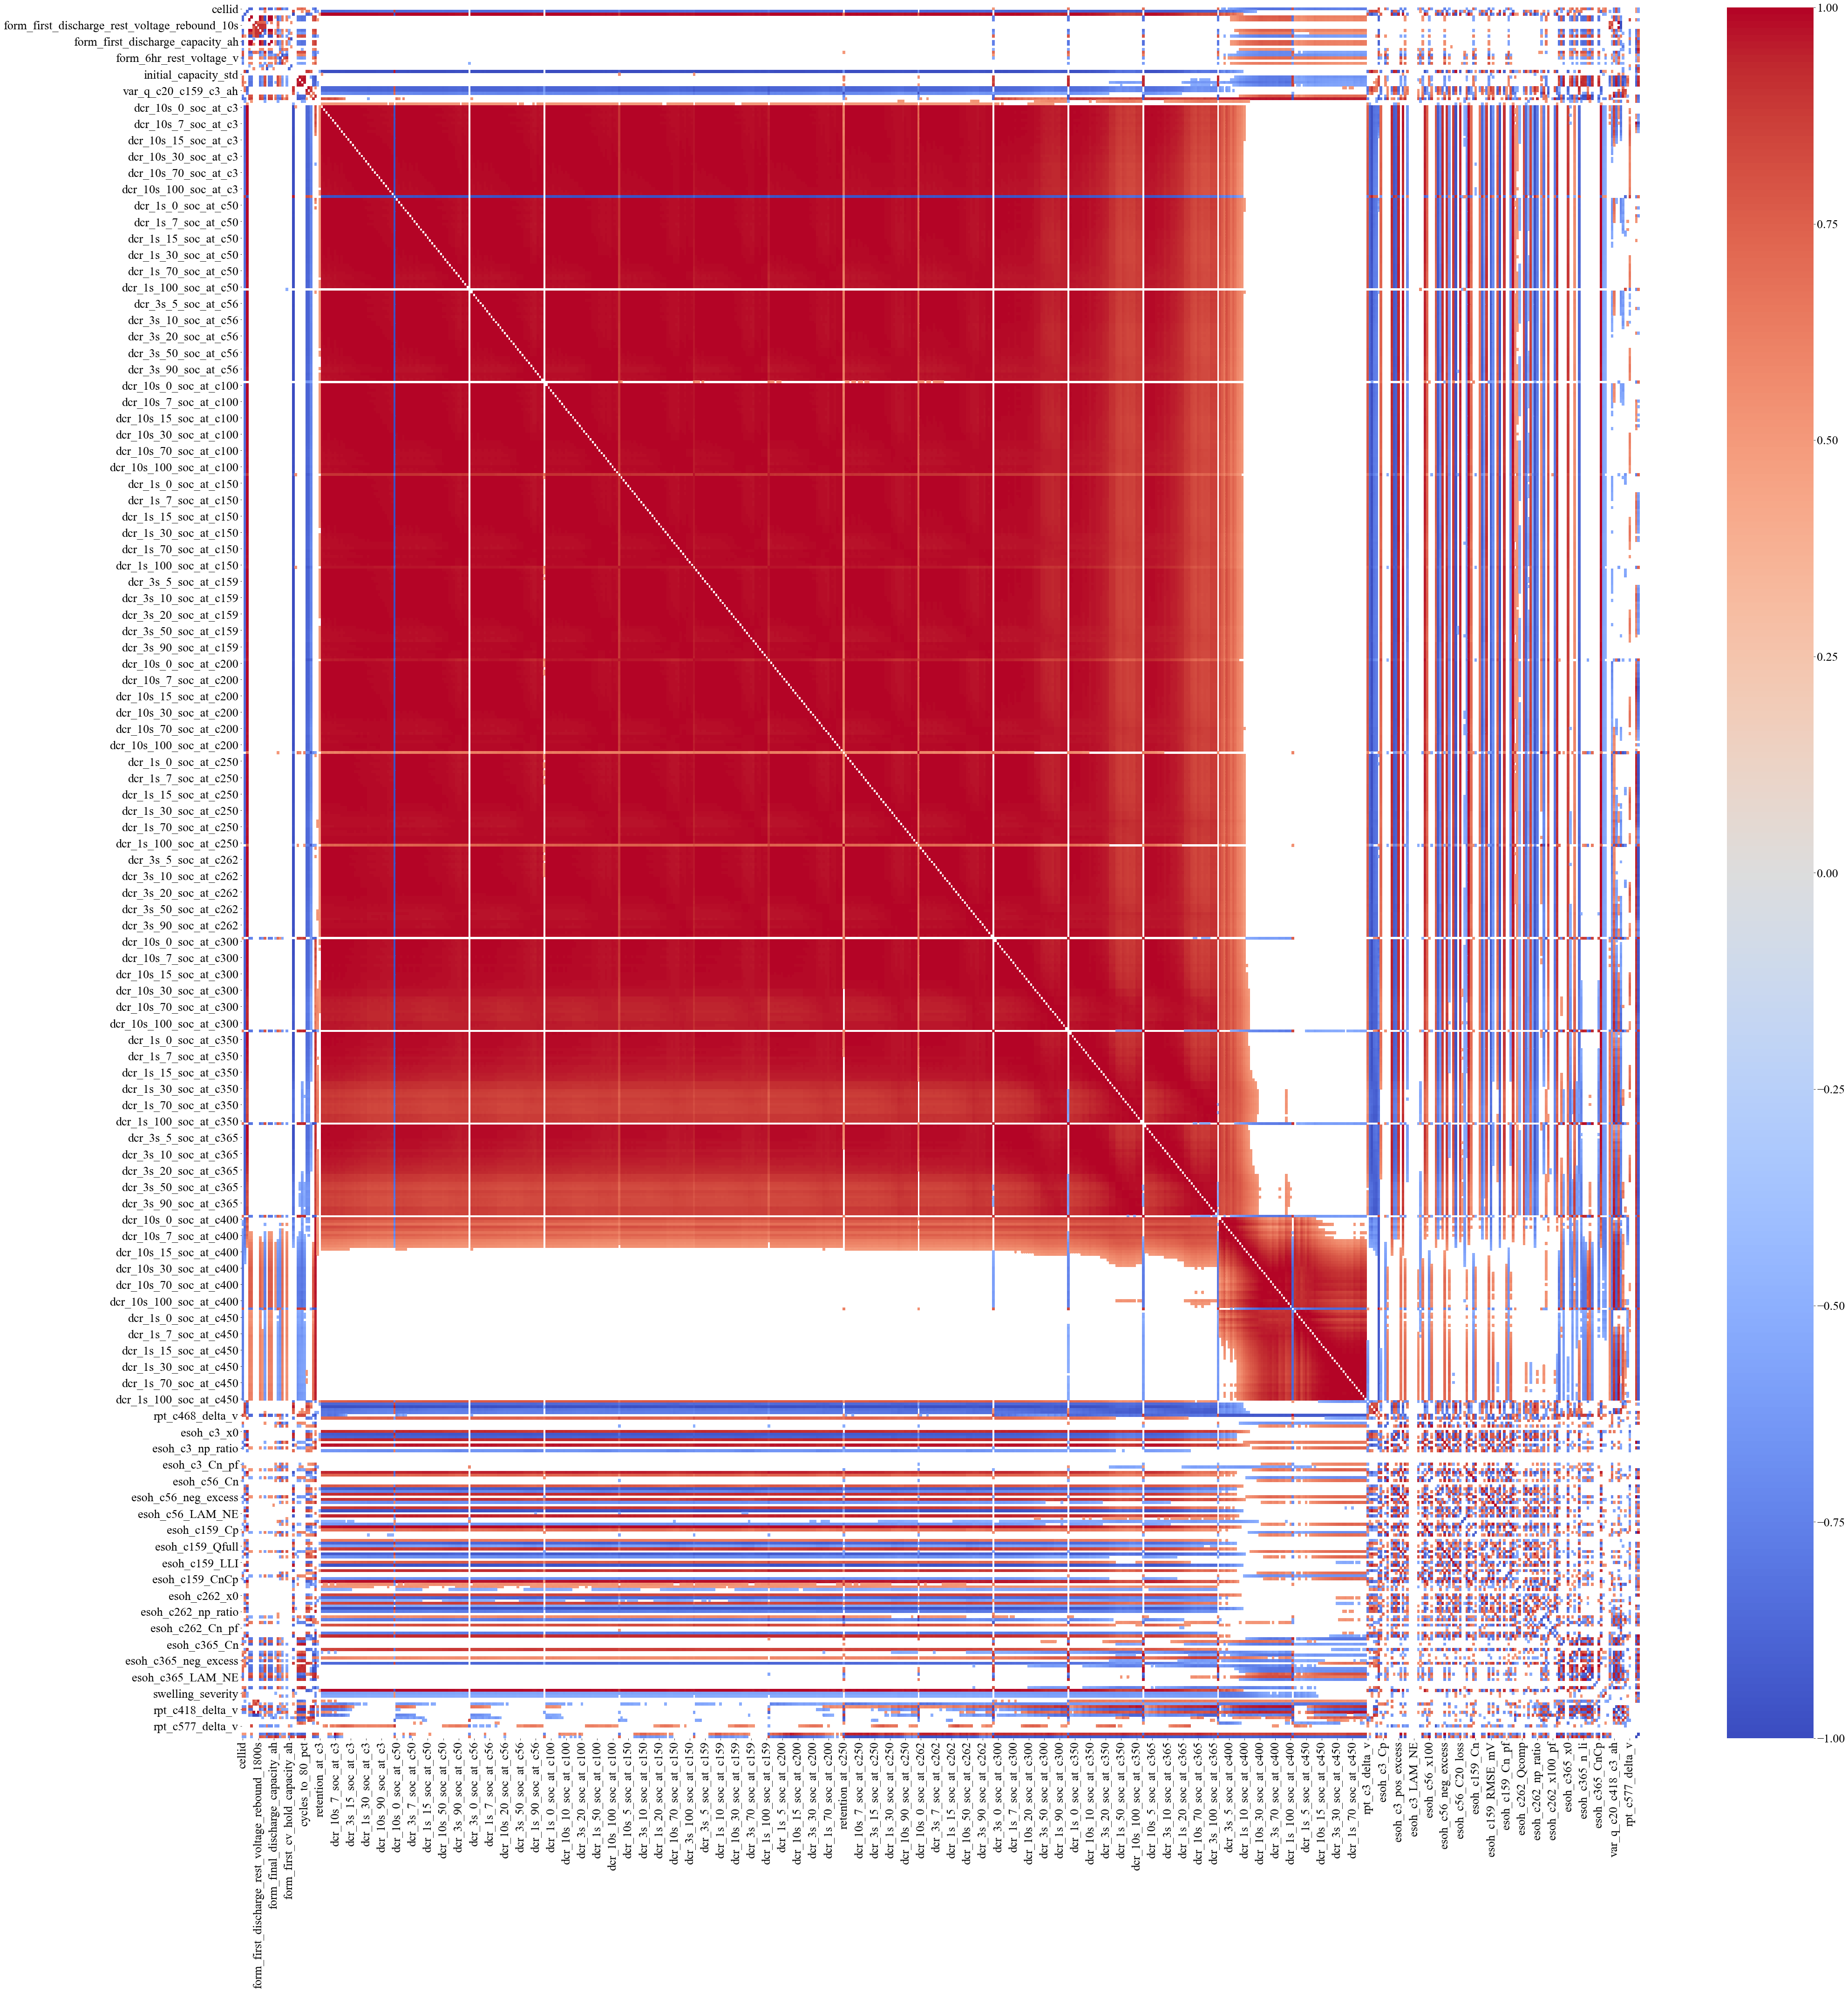

In [15]:
dfCorr = df_corr.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
fig = plt.figure(figsize=(60,60))
sns.heatmap(filteredDf, annot=False, cmap="coolwarm")
plt.savefig('correlation_matrix_all.png')
plt.show()

In [16]:
print(f'There will be { len(df_corr.columns)} x {(len(df_corr.columns) - 1)} correlations.')

There will be 663 x 662 correlations.


Processing cellid...


ValueError: ('Lengths must match to compare', (21,), (39,))

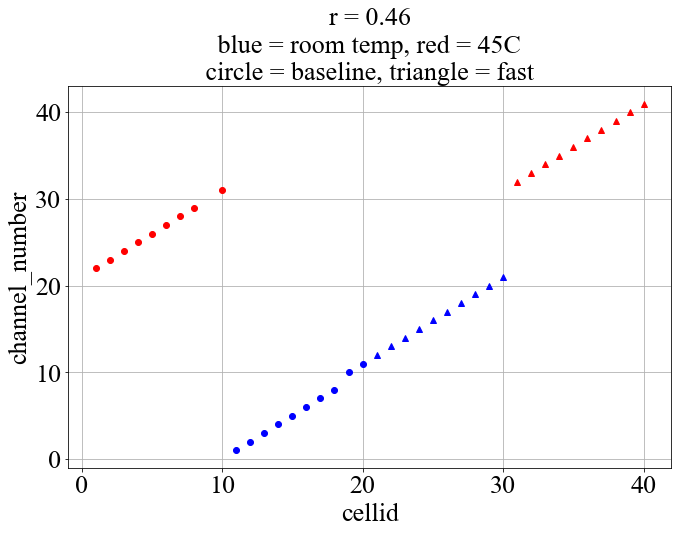

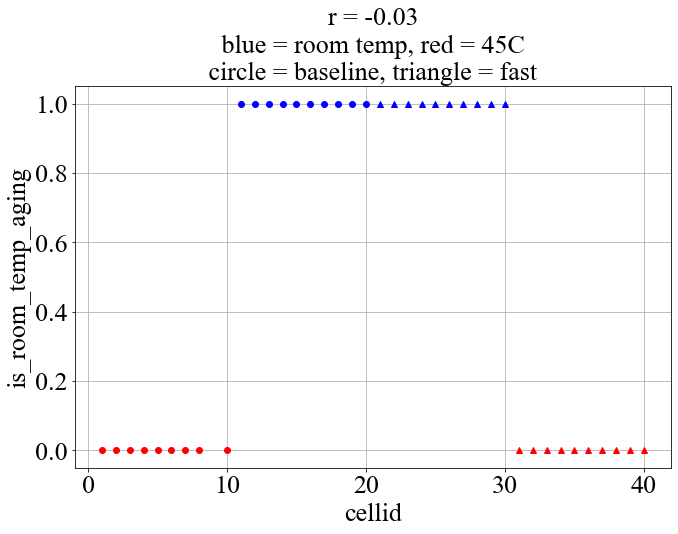

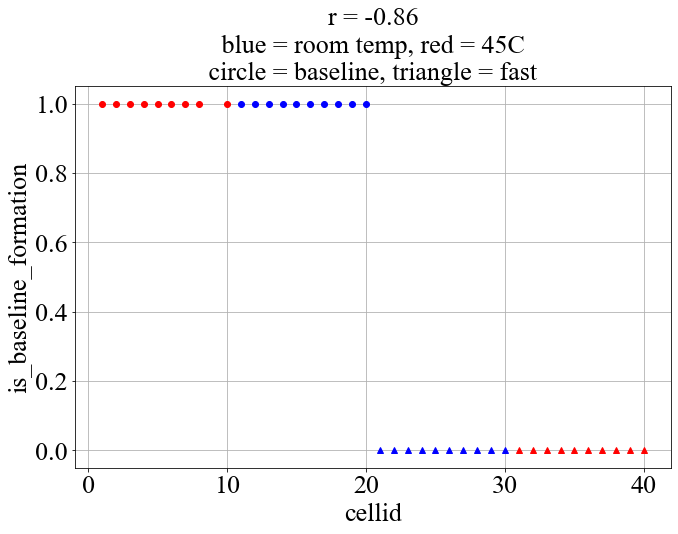

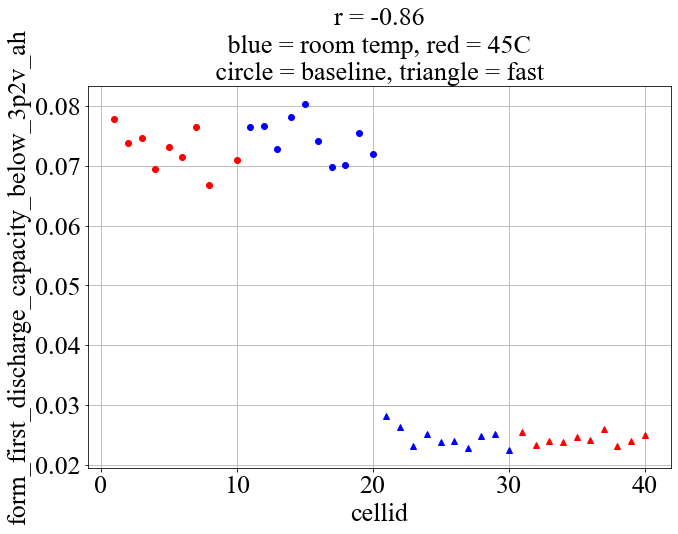

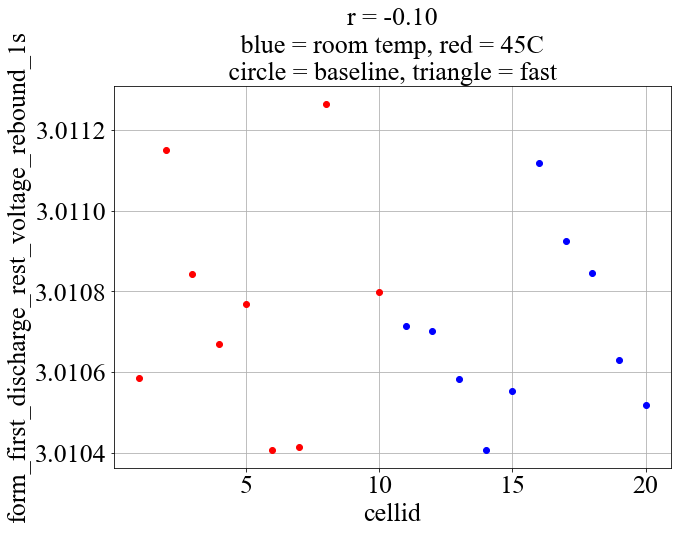

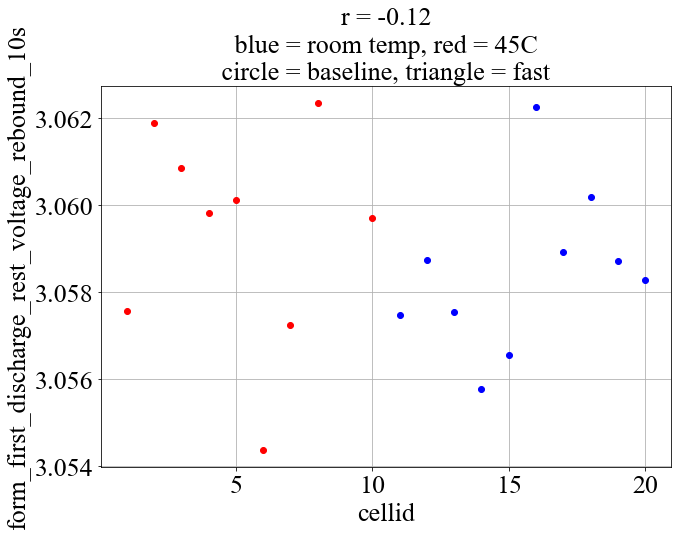

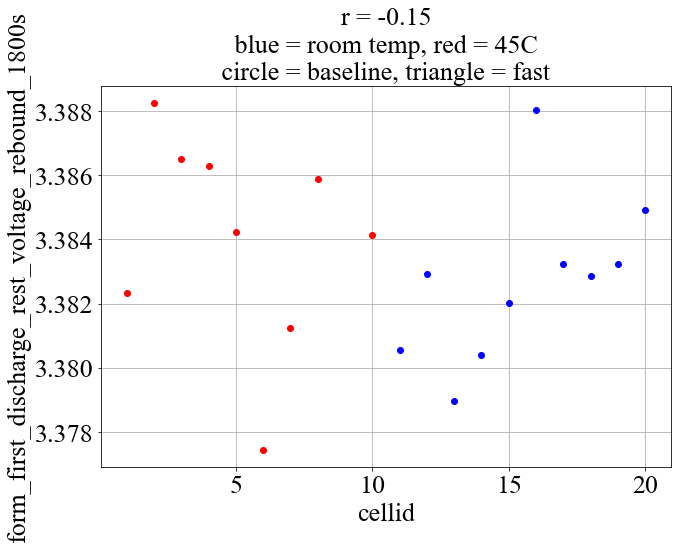

In [17]:
OUTPUT_CORR_PATH = 'output/2021-02-correlations'

for i in range(0, len(df_corr.columns)):
    
    print(f'Processing {df_corr.columns[i]}...')
    
    for j in range(0, len(df_corr.columns)):
        
        if i == j: 
            continue
            
        var1 = df_corr.columns[i]
        var2 = df_corr.columns[j]

        idx_nan = np.logical_or(df_corr[var1].isna(), df_corr[var2].isna())
        corr, _ = pearsonr(df_corr[var1][~idx_nan], df_corr[var2][~idx_nan])
        

        fig = plt.figure()

        for m in range(0, len(df_corr[var1])):

            color = 'b' if df_corr['is_room_temp_aging'][m] else 'r'
            marker = 'o' if df_corr['is_baseline_formation'][m] else '^'

            plt.plot(df_corr[var1][m], df_corr[var2][m],
                     color=color, marker=marker)

        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f'r = {corr:.2f}\n blue = room temp, red = 45C \n circle = baseline, triangle = fast ')    
        plt.savefig(f'{OUTPUT_CORR_PATH}/individual/corr_{var1}_vs_{var2}_R2_{corr**2:.2f}.png')
      
print('Done.')

### 